### Prerequirements

In [8]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import imageio
import glob

In [9]:
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)
for gpu in physical_devices:
    tf.config.experimental.set_memory_growth(gpu, enable=True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
model = keras.models.load_model('./generator/')

### Test final model  

In [25]:
results = []
for i in range(9):
    noise = tf.random.normal([1, 100])
    generated_image = model(noise, training=False)
    generated_image = np.array(generated_image).reshape(800, 800) * 255
    results.append(generated_image)
    plt.imsave(f'./images/result/result{i}.png', generated_image, cmap='gray')

result1 = np.concatenate(results[:3], 1)
result2 = np.concatenate(results[3:6], 1)
result3 = np.concatenate(results[6:9], 1)
result = np.concatenate([result1, result2, result3], 0)

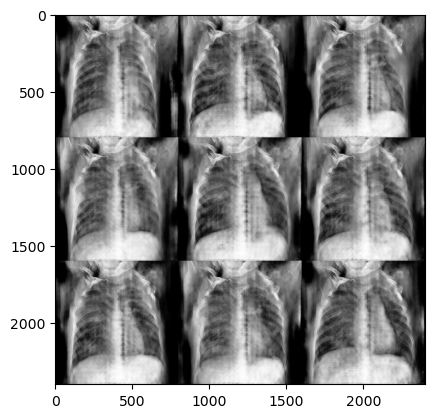

In [26]:
plt.imshow(result, cmap='gray')

### Create a gif file from all images of training process

In [6]:
anim_file = './images/training.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('./images/training_images/image_at*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        image = imageio.imread(filename)
        writer.append_data(image)


/tmp/ipykernel_1236560/2104422732.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
/tmp/ipykernel_1236560/2104422732.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
